In [ ]:
########################################################################################################################
# Filename: FF_Models.ipynb
#
# Purpose: Multi-label Text-categorization via feed forward neural networks

# Author(s): Bobby (Robert) Lumpkin
#
# Library Dependencies: numpy, pandas, scikit-learn, skmultilearn, joblib, os, sys, threshold_learning
########################################################################################################################

# Multilabel Text Classification with Feed Forward Networks

In [1]:
import numpy as np
import pandas as pd
import os
import json
import ast
import random
import tensorflow as tf
import tensorflow_addons as tfa
from bpmll import bp_mll_loss
import sklearn_json as skljson
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import sys
os.chdir('C:\\Users\\rober\\OneDrive\\Documents\\Multilabel-Text-Classification\\Deep Learning Models\\FF Models')  ## Set working directory
                                                                                                                      ## to be 'ANN Results'
sys.path.append('../../ThresholdFunctionLearning')    ## Append path to the ThresholdFunctionLearning directory to the interpreters
                                                   ## search path
from threshold_learning import predict_test_labels_binary    ## Import the 'predict_test_labels_binary()' function from the 
from threshold_learning import predict_labels_binary         ## threshold_learning library

In [2]:
## Load the seperabe PCs training and test data
npzfile = np.load("../../Data/tfidf_PC_separable.npz")
X_sepPCs_train = npzfile['X_sepPCs_train']
X_sepPCs_test = npzfile['X_sepPCs_test']
Y_train = npzfile['Y_train'].astype('float64')
Y_test = npzfile['Y_test'].astype('float64')

## Load the autoencoder train/test features
npzfile = np.load('../../Data/tfidf_encoded_data.npz')
encoded_train = npzfile['encoded_train']
encoded_test = npzfile['encoded_test']

## Load the tfidf training and test data
npzfile = np.load("../../Data/tfidf_trainTest_data.npz", allow_pickle = True)
X_tfidfTrain = npzfile['X_tfidfTrain']
X_tfidfTest = npzfile['X_tfidfTest']

# Cross Entropy Models -- Traditional ("Naive") Approach

## Training on Full (Sparse) TFIDF Vectors

In [3]:
## Start by defining and compiling a cross-entropy loss network to train on the full tfidf data (bpmll used later)
tf.random.set_seed(123)
num_labels = Y_train.shape[1]

model_ce_FF_tfidf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_labels, activation = 'sigmoid')
])

optim_func = tf.keras.optimizers.Adam(lr=0.01)

metric = tfa.metrics.HammingLoss(mode = 'multilabel', threshold = 0.5)

model_ce_FF_tfidf.compile(optimizer = optim_func,
              loss = 'binary_crossentropy', metrics = metric
              )

In [4]:
tf.random.set_seed(123)
history_ce_FF_tfidf_lr001 = model_ce_FF_tfidf.fit(X_tfidfTrain, Y_train, epochs = 30,
                                validation_data = (X_tfidfTest, Y_test), verbose = 0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [5]:
## (CAUTION: DO NOT OVERWRITE EXISTING FILES) -- Convert training history to dataframe and write to a .json file 
history_ce_FF_tfidf_lr001_df = pd.DataFrame(history_ce_FF_tfidf_lr001.history)
#with open("Training Histories/history_ce_FF_tfidf_lr001.json", "w") as outfile: 
#    history_ce_FF_tfidf_lr001_df.to_json(outfile)

Text(0.5, 1.0, 'Cross-Entropy Loss History')

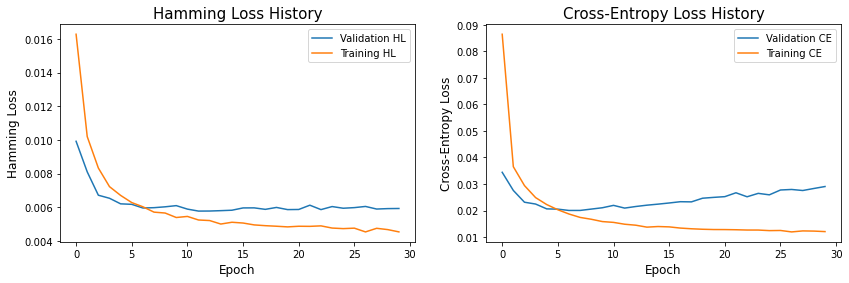

In [6]:
## Visualize the validation hamming and cross-entropy loss histories 
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(121)
ax1.plot(history_ce_FF_tfidf_lr001_df['val_hamming_loss'], label = 'Validation HL')
ax1.plot(history_ce_FF_tfidf_lr001_df['hamming_loss'], label = 'Training HL')
ax1.set_xlabel('Epoch', fontsize = 12)
ax1.set_ylabel('Hamming Loss', fontsize = 12)
ax1.legend()
ax1.set_title('Hamming Loss History', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.plot(history_ce_FF_tfidf_lr001_df['val_loss'], label = 'Validation CE')
ax2.plot(history_ce_FF_tfidf_lr001_df['loss'], label = 'Training CE')
ax2.set_xlabel('Epoch', fontsize = 12)
ax2.set_ylabel('Cross-Entropy Loss', fontsize = 12)
ax2.legend()
ax2.set_title('Cross-Entropy Loss History', fontsize = 15)
#plt.savefig('Reduced_Dataset_Learning_Rate_01.png')

## Training on Dimension-Reduced Separable PC Vectors

In [7]:
## Define and compile a cross-entropy loss network to train on the separable PCs (bpmll used later)
tf.random.set_seed(123)
num_labels = Y_train.shape[1]

model_ce_FF_sepPCs = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_labels, activation = 'sigmoid')
])

optim_func = tf.keras.optimizers.Adam(lr=0.01)

metric = tfa.metrics.HammingLoss(mode = 'multilabel', threshold = 0.5)

model_ce_FF_sepPCs.compile(optimizer = optim_func,
              loss = 'binary_crossentropy', metrics = metric
              )

In [8]:
tf.random.set_seed(123)
history_ce_FF_sepPCs_lr001 = model_ce_FF_sepPCs.fit(X_sepPCs_train, Y_train, epochs = 30,
                                validation_data = (X_sepPCs_test, Y_test), verbose = 0)

In [9]:
## (CAUTION: DO NOT OVERWRITE EXISTING FILES) -- Convert training history to dataframe and write to a .json file 
history_ce_FF_sepPCs_lr001_df = pd.DataFrame(history_ce_FF_sepPCs_lr001.history)
#with open("Training Histories/history_ce_FF_sepPCs_lr001.json", "w") as outfile: 
#    history_ce_FF_sepPCs_lr001_df.to_json(outfile)

Text(0.5, 1.0, 'Cross-Entropy Loss History')

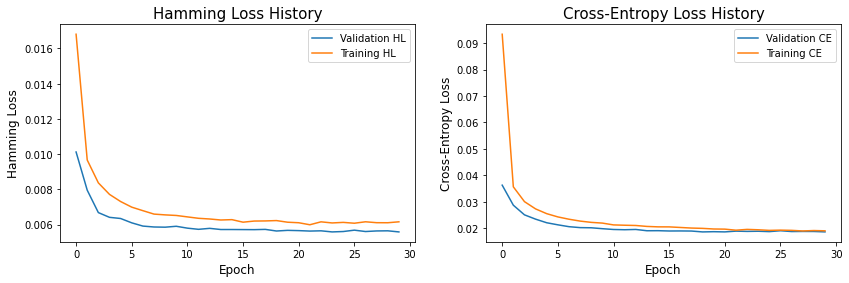

In [10]:
## Visualize the validation hamming and cross-entropy loss histories 
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(121)
ax1.plot(history_ce_FF_sepPCs_lr001_df['val_hamming_loss'], label = 'Validation HL')
ax1.plot(history_ce_FF_sepPCs_lr001_df['hamming_loss'], label = 'Training HL')
ax1.set_xlabel('Epoch', fontsize = 12)
ax1.set_ylabel('Hamming Loss', fontsize = 12)
ax1.legend()
ax1.set_title('Hamming Loss History', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.plot(history_ce_FF_sepPCs_lr001_df['val_loss'], label = 'Validation CE')
ax2.plot(history_ce_FF_sepPCs_lr001_df['loss'], label = 'Training CE')
ax2.set_xlabel('Epoch', fontsize = 12)
ax2.set_ylabel('Cross-Entropy Loss', fontsize = 12)
ax2.legend()
ax2.set_title('Cross-Entropy Loss History', fontsize = 15)
#plt.savefig('Reduced_Dataset_Learning_Rate_01.png')

## Training on Dimension-Reduced Autoencoder Feature Vectors

In [11]:
## Define and compile a cross-entropy loss network to train on the separable PCs (bpmll used later)
tf.random.set_seed(123)
num_labels = Y_train.shape[1]

model_ce_FF_encoded = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_labels, activation = 'sigmoid')
])

optim_func = tf.keras.optimizers.Adam(lr=0.01)

metric = tfa.metrics.HammingLoss(mode = 'multilabel', threshold = 0.5)

model_ce_FF_encoded.compile(optimizer = optim_func,
              loss = 'binary_crossentropy', metrics = metric
              )

In [12]:
tf.random.set_seed(123)
history_ce_FF_encoded_lr001 = model_ce_FF_encoded.fit(encoded_train, Y_train, epochs = 30,
                                validation_data = (encoded_test, Y_test), verbose = 0)

In [13]:
## (CAUTION: DO NOT OVERWRITE EXISTING FILES) -- Convert training history to dataframe and write to a .json file 
history_ce_FF_encoded_lr001_df = pd.DataFrame(history_ce_FF_encoded_lr001.history)
#with open("Training Histories/history_ce_FF_encoded_lr001.json", "w") as outfile: 
#    history_ce_FF_encoded_lr001_df.to_json(outfile)

Text(0.5, 1.0, 'Cross-Entropy Loss History')

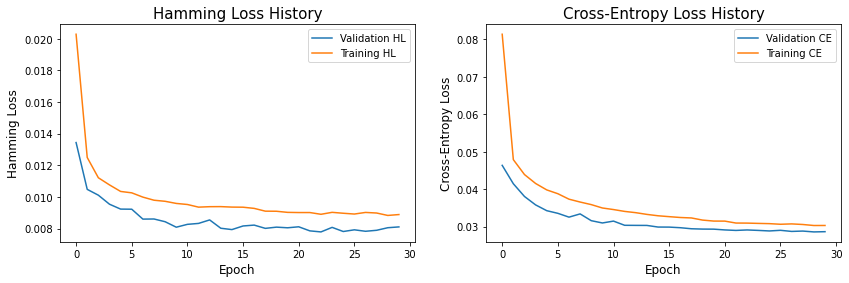

In [14]:
## Visualize the validation hamming and cross-entropy loss histories 
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(121)
ax1.plot(history_ce_FF_encoded_lr001_df['val_hamming_loss'], label = 'Validation HL')
ax1.plot(history_ce_FF_encoded_lr001_df['hamming_loss'], label = 'Training HL')
ax1.set_xlabel('Epoch', fontsize = 12)
ax1.set_ylabel('Hamming Loss', fontsize = 12)
ax1.legend()
ax1.set_title('Hamming Loss History', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.plot(history_ce_FF_encoded_lr001_df['val_loss'], label = 'Validation CE')
ax2.plot(history_ce_FF_encoded_lr001_df['loss'], label = 'Training CE')
ax2.set_xlabel('Epoch', fontsize = 12)
ax2.set_ylabel('Cross-Entropy Loss', fontsize = 12)
ax2.legend()
ax2.set_title('Cross-Entropy Loss History', fontsize = 15)
#plt.savefig('Reduced_Dataset_Learning_Rate_01.png')

# BPMLL Models -- "Novel" Approach

## Training on Full (Sparse) TFIDF Vectors

In [15]:
## Start by defining and compiling a bpmll loss network to train on the full tfidf data 
tf.random.set_seed(123)
num_labels = Y_train.shape[1]

model_bpmll_FF_tfidf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_labels, activation = 'sigmoid')
])

optim_func = tf.keras.optimizers.Adam(lr=0.01)

metric = tfa.metrics.HammingLoss(mode = 'multilabel', threshold = 0.5)

model_bpmll_FF_tfidf.compile(optimizer = optim_func,
              loss = bp_mll_loss, metrics = metric
              )

In [16]:
tf.random.set_seed(123)
history_bpmll_FF_tfidf_lr001 = model_bpmll_FF_tfidf.fit(X_tfidfTrain, Y_train, epochs = 30,
                                validation_data = (X_tfidfTest, Y_test), verbose = 0)

In [17]:
## (CAUTION: DO NOT OVERWRITE EXISTING FILES) -- Convert training history to dataframe and write to a .json file 
history_bpmll_FF_tfidf_lr001_df = pd.DataFrame(history_bpmll_FF_tfidf_lr001.history)
#with open("Training Histories/history_bpmll_FF_tfidf_lr001.json", "w") as outfile: 
#    history_bpmll_FF_tfidf_lr001_df.to_json(outfile)

Text(0.5, 1.0, 'BPMLL Loss History')

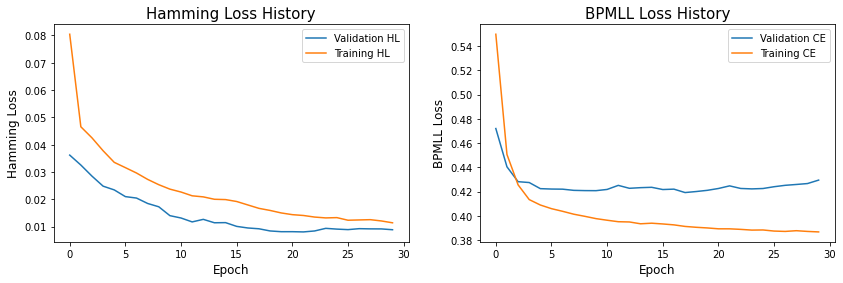

In [18]:
## Visualize the validation hamming and cross-entropy loss histories 
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(121)
ax1.plot(history_bpmll_FF_tfidf_lr001_df['val_hamming_loss'], label = 'Validation HL')
ax1.plot(history_bpmll_FF_tfidf_lr001_df['hamming_loss'], label = 'Training HL')
ax1.set_xlabel('Epoch', fontsize = 12)
ax1.set_ylabel('Hamming Loss', fontsize = 12)
ax1.legend()
ax1.set_title('Hamming Loss History', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.plot(history_bpmll_FF_tfidf_lr001_df['val_loss'], label = 'Validation CE')
ax2.plot(history_bpmll_FF_tfidf_lr001_df['loss'], label = 'Training CE')
ax2.set_xlabel('Epoch', fontsize = 12)
ax2.set_ylabel('BPMLL Loss', fontsize = 12)
ax2.legend()
ax2.set_title('BPMLL Loss History', fontsize = 15)
#plt.savefig('Reduced_Dataset_Learning_Rate_01.png')

## Training on Dimension-Reduced Separable PC Vectors

In [19]:
## Define and compile a bpmll loss network to train on the separable PCs 
tf.random.set_seed(123)
num_labels = Y_train.shape[1]

model_bpmll_FF_sepPCs = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_labels, activation = 'sigmoid')
])

optim_func = tf.keras.optimizers.Adam(lr=0.01)

metric = tfa.metrics.HammingLoss(mode = 'multilabel', threshold = 0.5)

model_bpmll_FF_sepPCs.compile(optimizer = optim_func,
              loss = 'binary_crossentropy', metrics = metric
              )

In [20]:
tf.random.set_seed(123)
history_bpmll_FF_sepPCs_lr001 = model_bpmll_FF_sepPCs.fit(X_sepPCs_train, Y_train, epochs = 30,
                                validation_data = (X_sepPCs_test, Y_test), verbose = 0)

In [21]:
## (CAUTION: DO NOT OVERWRITE EXISTING FILES) -- Convert training history to dataframe and write to a .json file 
history_bpmll_FF_sepPCs_lr001_df = pd.DataFrame(history_bpmll_FF_sepPCs_lr001.history)
#with open("Training Histories/history_bpmll_FF_sepPCs_lr001.json", "w") as outfile: 
#    history_bpmll_FF_sepPCs_lr001_df.to_json(outfile)

Text(0.5, 1.0, 'BPMLL Loss History')

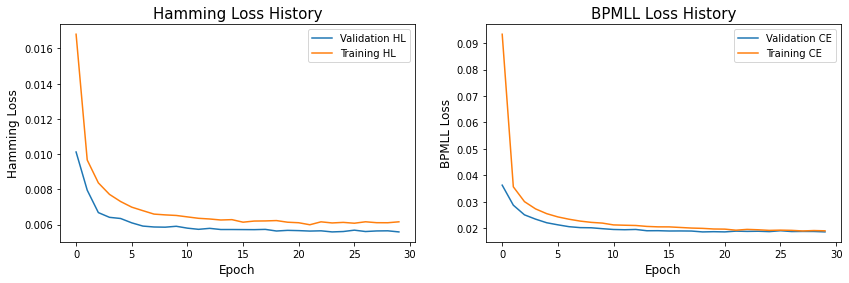

In [22]:
## Visualize the validation hamming and cross-entropy loss histories 
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(121)
ax1.plot(history_bpmll_FF_sepPCs_lr001_df['val_hamming_loss'], label = 'Validation HL')
ax1.plot(history_bpmll_FF_sepPCs_lr001_df['hamming_loss'], label = 'Training HL')
ax1.set_xlabel('Epoch', fontsize = 12)
ax1.set_ylabel('Hamming Loss', fontsize = 12)
ax1.legend()
ax1.set_title('Hamming Loss History', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.plot(history_bpmll_FF_sepPCs_lr001_df['val_loss'], label = 'Validation CE')
ax2.plot(history_bpmll_FF_sepPCs_lr001_df['loss'], label = 'Training CE')
ax2.set_xlabel('Epoch', fontsize = 12)
ax2.set_ylabel('BPMLL Loss', fontsize = 12)
ax2.legend()
ax2.set_title('BPMLL Loss History', fontsize = 15)
#plt.savefig('Reduced_Dataset_Learning_Rate_01.png')

## Training on Dimension-Reduced Autoencoder Feature Vectors

In [25]:
## Define and compile a cross-entropy loss network to train on the separable PCs (bpmll used later)
tf.random.set_seed(123)
num_labels = Y_train.shape[1]

model_bpmll_FF_encoded = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_labels, activation = 'sigmoid')
])

optim_func = tf.keras.optimizers.Adam(lr=0.01)

metric = tfa.metrics.HammingLoss(mode = 'multilabel', threshold = 0.5)

model_bpmll_FF_encoded.compile(optimizer = optim_func,
              loss = bp_mll_loss, metrics = metric
              )

In [26]:
tf.random.set_seed(123)
history_bpmll_FF_encoded_lr001 = model_bpmll_FF_encoded.fit(encoded_train, Y_train, epochs = 30,
                                                            validation_data = (encoded_test, Y_test), verbose = 0)

In [27]:
## (CAUTION: DO NOT OVERWRITE EXISTING FILES) -- Convert training history to dataframe and write to a .json file 
history_bpmll_FF_encoded_lr001_df = pd.DataFrame(history_bpmll_FF_encoded_lr001.history)
#with open("Training Histories/history_bpmll_FF_encoded_lr001.json", "w") as outfile: 
#    history_bpmll_FF_encoded_lr001_df.to_json(outfile)

Text(0.5, 1.0, 'BPMLL Loss History')

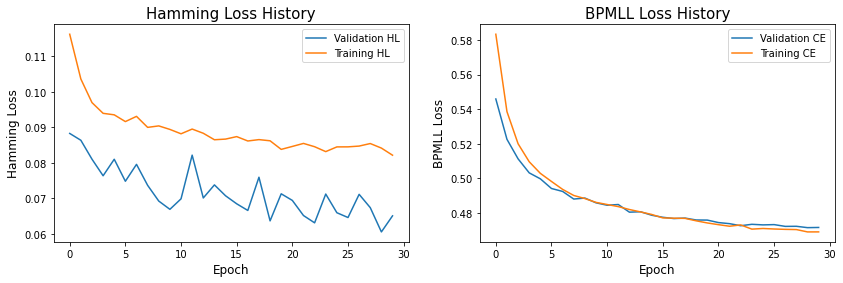

In [28]:
## Visualize the validation hamming and cross-entropy loss histories 
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(121)
ax1.plot(history_bpmll_FF_encoded_lr001_df['val_hamming_loss'], label = 'Validation HL')
ax1.plot(history_bpmll_FF_encoded_lr001_df['hamming_loss'], label = 'Training HL')
ax1.set_xlabel('Epoch', fontsize = 12)
ax1.set_ylabel('Hamming Loss', fontsize = 12)
ax1.legend()
ax1.set_title('Hamming Loss History', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.plot(history_bpmll_FF_encoded_lr001_df['val_loss'], label = 'Validation CE')
ax2.plot(history_bpmll_FF_encoded_lr001_df['loss'], label = 'Training CE')
ax2.set_xlabel('Epoch', fontsize = 12)
ax2.set_ylabel('BPMLL Loss', fontsize = 12)
ax2.legend()
ax2.set_title('BPMLL Loss History', fontsize = 15)
#plt.savefig('Reduced_Dataset_Learning_Rate_01.png')

# Results

Text(0.5, 1.0, 'Dimension Reduction Comparison (BPMLL Loss)')

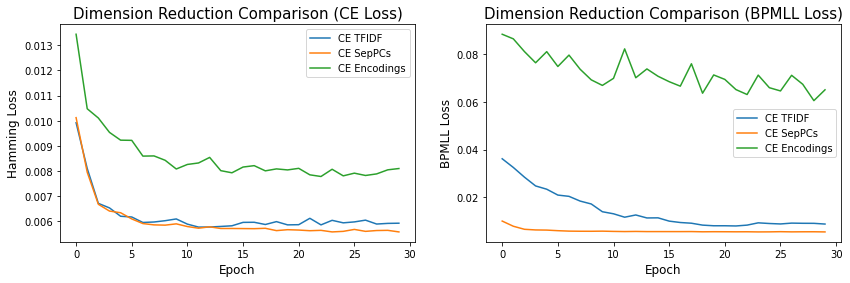

In [29]:
## Visualize the validation hamming and cross-entropy loss histories for comparing dimension reduction techniques
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(121)
ax1.plot(history_ce_FF_tfidf_lr001_df['val_hamming_loss'], label = 'CE TFIDF')
ax1.plot(history_ce_FF_sepPCs_lr001_df['val_hamming_loss'], label = 'CE SepPCs')
ax1.plot(history_ce_FF_encoded_lr001_df['val_hamming_loss'], label = 'CE Encodings')
ax1.set_xlabel('Epoch', fontsize = 12)
ax1.set_ylabel('Hamming Loss', fontsize = 12)
ax1.legend()
ax1.set_title('Dimension Reduction Comparison (CE Loss)', fontsize = 15)

ax2 = fig.add_subplot(122)
ax2.plot(history_bpmll_FF_tfidf_lr001_df['val_hamming_loss'], label = 'CE TFIDF')
ax2.plot(history_bpmll_FF_sepPCs_lr001_df['val_hamming_loss'], label = 'CE SepPCs')
ax2.plot(history_bpmll_FF_encoded_lr001_df['val_hamming_loss'], label = 'CE Encodings')
ax2.set_xlabel('Epoch', fontsize = 12)
ax2.set_ylabel('BPMLL Loss', fontsize = 12)
ax2.legend()
ax2.set_title('Dimension Reduction Comparison (BPMLL Loss)', fontsize = 15)
#plt.savefig('Reduced_Dataset_Learning_Rate_01.png')

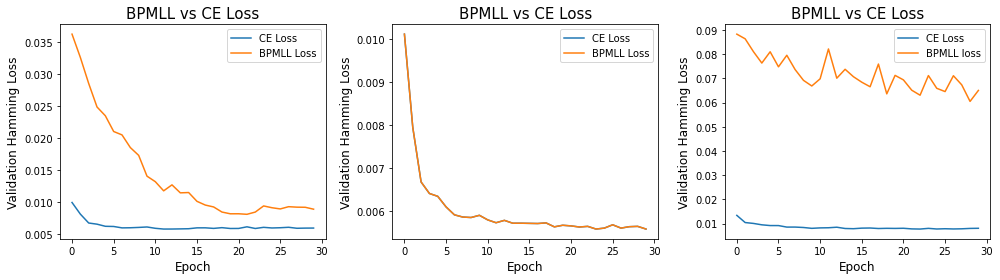

In [37]:
## Visualize the validation hamming and cross-entropy loss histories for comparing loss functions
fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(131)
ax1.plot(history_ce_FF_tfidf_lr001_df['val_hamming_loss'], label = 'CE Loss')
ax1.plot(history_bpmll_FF_tfidf_lr001_df['val_hamming_loss'], label = 'BPMLL Loss')
ax1.set_xlabel('Epoch', fontsize = 12)
ax1.set_ylabel('Validation Hamming Loss', fontsize = 12)
ax1.legend()
ax1.set_title('BPMLL vs CE Loss', fontsize = 15)

ax2 = fig.add_subplot(132)
ax2.plot(history_ce_FF_sepPCs_lr001_df['val_hamming_loss'], label = 'CE Loss')
ax2.plot(history_bpmll_FF_sepPCs_lr001_df['val_hamming_loss'], label = 'BPMLL Loss')
ax2.set_xlabel('Epoch', fontsize = 12)
ax2.set_ylabel('Validation Hamming Loss', fontsize = 12)
ax2.legend()
ax2.set_title('BPMLL vs CE Loss', fontsize = 15)

ax3 = fig.add_subplot(133)
ax3.plot(history_ce_FF_encoded_lr001_df['val_hamming_loss'], label = 'CE Loss')
ax3.plot(history_bpmll_FF_encoded_lr001_df['val_hamming_loss'], label = 'BPMLL loss')
ax3.set_xlabel('Epoch', fontsize = 12)
ax3.set_ylabel('Validation Hamming Loss', fontsize = 12)
ax3.legend()
ax3.set_title('BPMLL vs CE Loss', fontsize = 15)
fig.tight_layout()
#plt.savefig('Reduced_Dataset_Learning_Rate_01.png')